This tutorial is inspired from https://www.youtube.com/watch?v=8Ku98c2w0Dk

The dataset provided is a sports dataset which contains information about matches that have been played in different regions from January to December.

Here are the questions given in the youtube channel. Some questions will be taken from here and the other you can try it on your own.

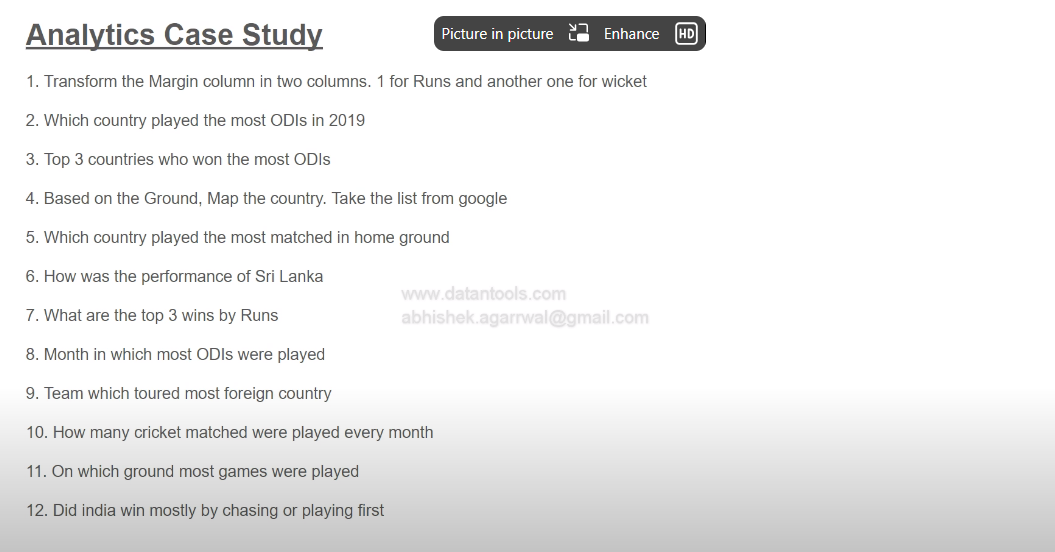

The basics of function can be learnt from : https://www.geeksforgeeks.org/python-functions/

1.  List the team that won by 8 wickets
2.  Make another column "Margin type" whiere value is "run" for the rows that are measured by "run" and value is "wicket" for the rows that are measure by  "wickets" from the column *Margin*.
3.  Make two dataframes from the *run* and *wickets* row type and make another column where *Margin* column is of integer type.
4.  (group_by) sum of total runs and wickets
5.  Print sum of the runs where *Team 2* is *Pakistan*
6.  Which country played the most "ODI"s in 2019
7.  Top 3 countries who won the most ODIs
8.  List of matches in the month of January, 2018
9.  Month in which most ODIs were played
10.  How many cricket matches were played every month?
11.  On which ground most games were played?
12.  Name the countries that played on the ground "Wellington" or "Dhaka"
13.  Print the observations of matches within the tine range January 25th, 2018 to April 25th, 2018
14.  Print the mean of runs every month.

In [1]:
import os
os.listdir()

['1 - 2019 ODI Cricket Matches.xlsx',
 'Dataframe filtering more questions.ipynb',
 '.ipynb_checkpoints',
 'desktop.ini']

In [2]:
import pandas as pd
df = pd.read_excel('1 - 2019 ODI Cricket Matches.xlsx')
df

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
0,New Zealand,Pakistan,New Zealand,61 runs,Wellington,2018-01-06,ODI # 3946
1,New Zealand,Pakistan,New Zealand,8 wickets,Nelson,2018-01-09,ODI # 3947
2,U.A.E.,Ireland,Ireland,4 wickets,ICCA Dubai,2018-01-11,ODI # 3948
3,New Zealand,Pakistan,New Zealand,183 runs,Dunedin,2018-01-13,ODI # 3949
4,U.A.E.,Ireland,Ireland,67 runs,ICCA Dubai,2018-01-13,ODI # 3950
...,...,...,...,...,...,...,...
123,Australia,South Africa,South Africa,40 runs,Hobart,2018-11-11,ODI # 4069
124,New Zealand,Pakistan,no result,NaN,Dubai (DSC),2018-11-11,ODI # 4070
125,Bangladesh,West Indies,Bangladesh,5 wickets,Dhaka,2018-12-09,ODI # 4071
126,Bangladesh,West Indies,West Indies,4 wickets,Dhaka,2018-12-11,ODI # 4072


In [12]:
df["Margin"][0]

'61 runs'

In [13]:
df["Margin"] = df["Margin"].astype(str)
df["Margin"]

0        61 runs
1      8 wickets
2      4 wickets
3       183 runs
4        67 runs
         ...    
123      40 runs
124          nan
125    5 wickets
126    4 wickets
127    8 wickets
Name: Margin, Length: 128, dtype: object

In [22]:
df["Margin"] = df["Margin"].fillna("")

In [23]:
df["Margin"].isna().any()

False

In [6]:
# 1.
df[df["Margin"]=="8 wickets"]["Winner"].to_list()

['New Zealand',
 'Bangladesh',
 'India',
 'India',
 'England',
 'Afghanistan',
 'Pakistan',
 'India',
 'India',
 'Bangladesh']

In [7]:
# 2.
def margin_type(margin):
    if "run" in margin:
        return "run"
    if "wicket" in margin:
        return "wicket"

In [31]:
# **********
import math
math.nan

nan

In [32]:
nan_value = math.nan
nan_value

nan

In [33]:
math.isnan(nan_value)

True

In [34]:
math.isnan(4)

False

In [54]:
# 2.
# hw - find error in function - why does the function does not take -""
def margin_int(margin):
    # if math.isnan(margin):
    #     return -1
    # if margin == "":
    #     return -1
    # 61 runs
    try:
        text = margin.split()
        # [61, runs]
        text = text[0]
        # 61
        text = int(text)
        return text
    except:
        return -1

In [55]:
margin_type("8 runs")


'run'

In [56]:
margin_int("4 wickets")

4

In [57]:


text = margin.split()
# [61, runs]
text = text[0]
# 61
text = int(text)

In [58]:
# if math.isnan(margin):
#     return -1
# if margin == "":
#     return -1
text = "4 wickets".split()
# [61, runs]
print(text)
text = text[0]
print(text)
# 61
text = int(text)
print(text)

['4', 'wickets']
4
4


In [59]:
df["margin_type"] = df["Margin"].apply(margin_type)
df

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,margin_type
0,New Zealand,Pakistan,New Zealand,61 runs,Wellington,2018-01-06,ODI # 3946,run
1,New Zealand,Pakistan,New Zealand,8 wickets,Nelson,2018-01-09,ODI # 3947,wicket
2,U.A.E.,Ireland,Ireland,4 wickets,ICCA Dubai,2018-01-11,ODI # 3948,wicket
3,New Zealand,Pakistan,New Zealand,183 runs,Dunedin,2018-01-13,ODI # 3949,run
4,U.A.E.,Ireland,Ireland,67 runs,ICCA Dubai,2018-01-13,ODI # 3950,run
...,...,...,...,...,...,...,...,...
123,Australia,South Africa,South Africa,40 runs,Hobart,2018-11-11,ODI # 4069,run
124,New Zealand,Pakistan,no result,nan,Dubai (DSC),2018-11-11,ODI # 4070,None
125,Bangladesh,West Indies,Bangladesh,5 wickets,Dhaka,2018-12-09,ODI # 4071,wicket
126,Bangladesh,West Indies,West Indies,4 wickets,Dhaka,2018-12-11,ODI # 4072,wicket


In [60]:
df["margin_int"] = df["Margin"].apply(margin_int)
df

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,margin_type,margin_int
0,New Zealand,Pakistan,New Zealand,61 runs,Wellington,2018-01-06,ODI # 3946,run,61
1,New Zealand,Pakistan,New Zealand,8 wickets,Nelson,2018-01-09,ODI # 3947,wicket,8
2,U.A.E.,Ireland,Ireland,4 wickets,ICCA Dubai,2018-01-11,ODI # 3948,wicket,4
3,New Zealand,Pakistan,New Zealand,183 runs,Dunedin,2018-01-13,ODI # 3949,run,183
4,U.A.E.,Ireland,Ireland,67 runs,ICCA Dubai,2018-01-13,ODI # 3950,run,67
...,...,...,...,...,...,...,...,...,...
123,Australia,South Africa,South Africa,40 runs,Hobart,2018-11-11,ODI # 4069,run,40
124,New Zealand,Pakistan,no result,nan,Dubai (DSC),2018-11-11,ODI # 4070,None,-1
125,Bangladesh,West Indies,Bangladesh,5 wickets,Dhaka,2018-12-09,ODI # 4071,wicket,5
126,Bangladesh,West Indies,West Indies,4 wickets,Dhaka,2018-12-11,ODI # 4072,wicket,4


In [39]:
# function debugging
for margin in df["Margin"]:
    print(margin)
    try:
        margin_int(margin)
    except:
        print("error is in",margin)

61 runs
error is in 61 runs
8 wickets
error is in 8 wickets
4 wickets
error is in 4 wickets
183 runs
error is in 183 runs
67 runs
error is in 67 runs
5 wickets
error is in 5 wickets
8 wickets
error is in 8 wickets
5 wickets
error is in 5 wickets
6 wickets
error is in 6 wickets
12 runs
error is in 12 runs
24 runs
error is in 24 runs
15 runs
error is in 15 runs
4 wickets
error is in 4 wickets
163 runs
error is in 163 runs
16 runs
error is in 16 runs
31 runs
error is in 31 runs
5 wickets
error is in 5 wickets
4 wickets
error is in 4 wickets
91 runs
error is in 91 runs
10 wickets
error is in 10 wickets
3 wickets
error is in 3 wickets
79 runs
error is in 79 runs
12 runs
error is in 12 runs
6 wickets
error is in 6 wickets
9 wickets
error is in 9 wickets
124 runs
error is in 124 runs
154 runs
error is in 154 runs
5 wickets
error is in 5 wickets
154 runs
error is in 154 runs
6 wickets
error is in 6 wickets
73 runs
error is in 73 runs
10 wickets
error is in 10 wickets
8 wickets
error is in 8 wi

In [61]:
df

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,margin_type,margin_int
0,New Zealand,Pakistan,New Zealand,61 runs,Wellington,2018-01-06,ODI # 3946,run,61
1,New Zealand,Pakistan,New Zealand,8 wickets,Nelson,2018-01-09,ODI # 3947,wicket,8
2,U.A.E.,Ireland,Ireland,4 wickets,ICCA Dubai,2018-01-11,ODI # 3948,wicket,4
3,New Zealand,Pakistan,New Zealand,183 runs,Dunedin,2018-01-13,ODI # 3949,run,183
4,U.A.E.,Ireland,Ireland,67 runs,ICCA Dubai,2018-01-13,ODI # 3950,run,67
...,...,...,...,...,...,...,...,...,...
123,Australia,South Africa,South Africa,40 runs,Hobart,2018-11-11,ODI # 4069,run,40
124,New Zealand,Pakistan,no result,nan,Dubai (DSC),2018-11-11,ODI # 4070,None,-1
125,Bangladesh,West Indies,Bangladesh,5 wickets,Dhaka,2018-12-09,ODI # 4071,wicket,5
126,Bangladesh,West Indies,West Indies,4 wickets,Dhaka,2018-12-11,ODI # 4072,wicket,4


in df_run and df_wickets dataframes, the extra condition is not required:    
if margin == "":
        return 0 
            
if margin == "":
        return -1
in second function margin_int, explain why?

In [15]:
df_run = df[df["margin_type"]=="run"]
df_run

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,margin_type
0,New Zealand,Pakistan,New Zealand,61 runs,Wellington,2018-01-06,ODI # 3946,run
3,New Zealand,Pakistan,New Zealand,183 runs,Dunedin,2018-01-13,ODI # 3949,run
4,U.A.E.,Ireland,Ireland,67 runs,ICCA Dubai,2018-01-13,ODI # 3950,run
9,Sri Lanka,Zimbabwe,Zimbabwe,12 runs,Dhaka,2018-01-17,ODI # 3955,run
10,Ireland,Scotland,Ireland,24 runs,ICCA Dubai,2018-01-18,ODI # 3956,run
...,...,...,...,...,...,...,...,...
116,India,West Indies,West Indies,43 runs,Pune,2018-10-27,ODI # 4062,run
117,India,West Indies,India,224 runs,Mumbai (BS),2018-10-29,ODI # 4063,run
120,New Zealand,Pakistan,New Zealand,47 runs,Abu Dhabi,2018-11-07,ODI # 4066,run
121,Australia,South Africa,Australia,7 runs,Adelaide,2018-11-09,ODI # 4067,run


In [16]:
df_wickets = df[df["margin_type"]=="wicket"]
df_wickets

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,margin_type
1,New Zealand,Pakistan,New Zealand,8 wickets,Nelson,2018-01-09,ODI # 3947,wicket
2,U.A.E.,Ireland,Ireland,4 wickets,ICCA Dubai,2018-01-11,ODI # 3948,wicket
5,Australia,England,England,5 wickets,Melbourne,2018-01-14,ODI # 3951,wicket
6,Bangladesh,Zimbabwe,Bangladesh,8 wickets,Dhaka,2018-01-15,ODI # 3952,wicket
7,New Zealand,Pakistan,New Zealand,5 wickets,Hamilton,2018-01-16,ODI # 3953,wicket
8,Ireland,Scotland,Ireland,6 wickets,ICCA Dubai,2018-01-16,ODI # 3954,wicket
12,Australia,England,England,4 wickets,Brisbane,2018-01-19,ODI # 3958,wicket
16,Sri Lanka,Zimbabwe,Sri Lanka,5 wickets,Dhaka,2018-01-21,ODI # 3962,wicket
17,U.A.E.,Scotland,U.A.E.,4 wickets,ICCA Dubai,2018-01-23,ODI # 3963,wicket
19,Bangladesh,Sri Lanka,Sri Lanka,10 wickets,Dhaka,2018-01-25,ODI # 3965,wicket


In [62]:
3.

3.0

In [63]:
df

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,margin_type,margin_int
0,New Zealand,Pakistan,New Zealand,61 runs,Wellington,2018-01-06,ODI # 3946,run,61
1,New Zealand,Pakistan,New Zealand,8 wickets,Nelson,2018-01-09,ODI # 3947,wicket,8
2,U.A.E.,Ireland,Ireland,4 wickets,ICCA Dubai,2018-01-11,ODI # 3948,wicket,4
3,New Zealand,Pakistan,New Zealand,183 runs,Dunedin,2018-01-13,ODI # 3949,run,183
4,U.A.E.,Ireland,Ireland,67 runs,ICCA Dubai,2018-01-13,ODI # 3950,run,67
...,...,...,...,...,...,...,...,...,...
123,Australia,South Africa,South Africa,40 runs,Hobart,2018-11-11,ODI # 4069,run,40
124,New Zealand,Pakistan,no result,nan,Dubai (DSC),2018-11-11,ODI # 4070,None,-1
125,Bangladesh,West Indies,Bangladesh,5 wickets,Dhaka,2018-12-09,ODI # 4071,wicket,5
126,Bangladesh,West Indies,West Indies,4 wickets,Dhaka,2018-12-11,ODI # 4072,wicket,4


In [65]:
# sum of run
# sum of wickets
# margin_int er group er sum

In [71]:
df.groupby(["margin_type"]).agg("margin_int").sum()

margin_type
run       4841
wicket     350
Name: margin_int, dtype: int64

In [72]:
df.groupby(["margin_type"]).agg(sum_margin = ("margin_int","sum"))

,sum_margin
margin_type,
run,4841
wicket,350


In [74]:
df.groupby(["margin_type"]).agg(sum_margin = ("margin_int","sum")).reset_index()

,margin_type,sum_margin
0,run,4841
1,wicket,350
